# TASK 1  movie_genre_classification

In [1]:
!pip install wordcloud
!pip install nltk

ERROR: Could not find a version that satisfies the requirement wordcloud (from versions: none)
ERROR: No matching distribution found for wordcloud
ERROR: Could not find a version that satisfies the requirement nltk (from versions: none)
ERROR: No matching distribution found for nltk


In [22]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [23]:
#importing training data
data = pd.read_csv('./train_data.txt', delimiter=':::' ,header = None ,engine='python')

In [24]:
# naming columns
data.columns = ['id','title','genre','desc']
data.head()

id                               title       genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                                desc  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...

In [25]:
#dropping duplicates
data.drop_duplicates(inplace = True)
#dropping null values
data.dropna(inplace = True)

In [26]:
data.shape

(54214, 4)

In [27]:
#setting stopwords
stopwords = set(stopwords.words('english'))

In [28]:
def preprocessing(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation using regular expressions
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove specific characters #, @, and $
    text = re.sub(r'[#@\$]', '', text)
    
    # tokenize and convert to list
    tokens = word_tokenize(text)
    
    ## Lemmatize it 
    lemmatizer  = WordNetLemmatizer()
    
    ## lemmatize each token
   # text = [lemmatizer.lemmatize(token) for token in tokens]
    text = text.split()
    
    text = [word for word in text if word not in stopwords]
    
    
    return " ".join(text) 

In [29]:
# we need to preprocess the description
data["desc_clean"] =  data["desc"].apply(preprocessing)

In [30]:
data['desc_clean']

0        listening conversation doctor parents 10yearol...
1        brother sister past incestuous relationship cu...
2        bus empties students field trip museum natural...
3        help unemployed father make ends meet edith tw...
4        films title refers unrecovered bodies ground z...
                               ...                        
54209    shortlived nbc live sitcom centered bonino wor...
54210    next generation exploitation sisters kapa bay ...
54211    ze bestaan echt standup comedy growing facing ...
54212    walter vivian live country difficult time keep...
54213    labor day weekend 1935 intense hurricane ever ...
Name: desc_clean, Length: 54214, dtype: object

In [31]:
data["genre"].value_counts()

genre
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

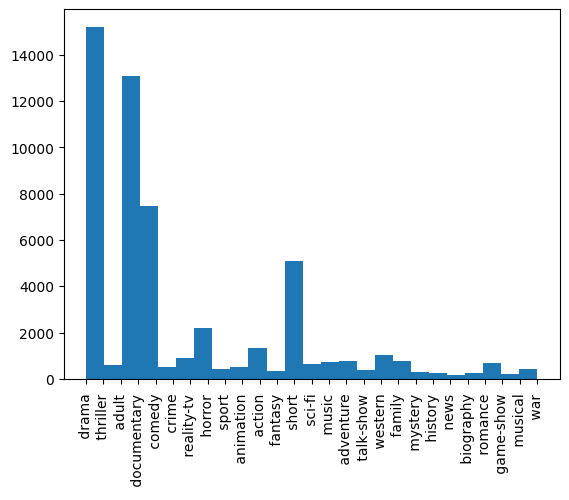

In [32]:
plt.hist(data['genre'],bins=25)
plt.xticks(rotation=90)
plt.show()

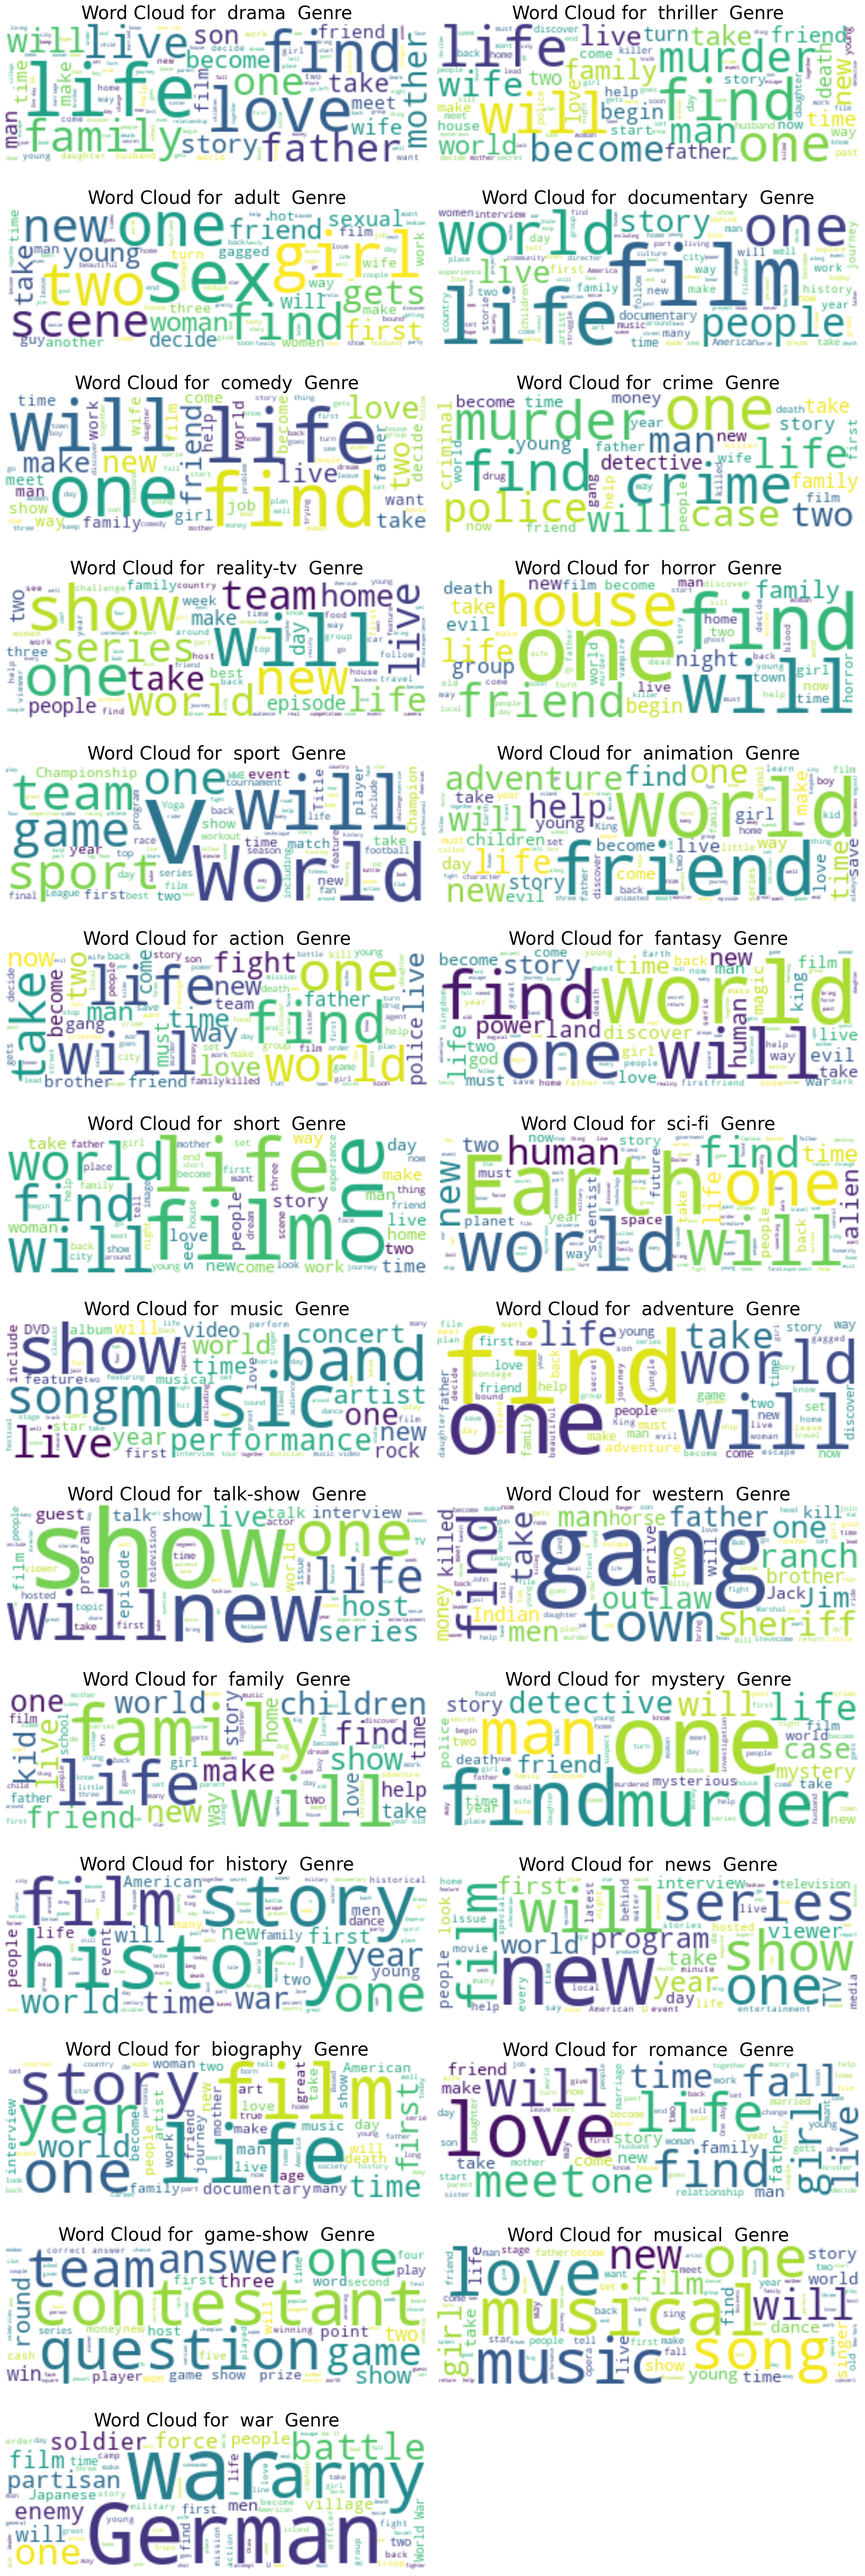

In [34]:
genres = data['genre'].unique()
plt.figure(figsize=(20, 60))

# Iterate over each genre
for i, genre in enumerate(genres, 1):
    plt.subplot(14, 2, i)  # Assuming you have 14 rows and 2 columns for 28 genres
    text_subset = " ".join(list(data[data["genre"] == genre]['desc']))
    wordcloud = WordCloud(max_words=300, width=300, height=100, background_color='white').generate(text_subset)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {genre} Genre',fontsize=30)
    plt.axis('off')
    
plt.tight_layout()
plt.show()

In [35]:
# removing lesser relevant feautures
data.drop(['id','title'], axis=1)
data.head()

id                               title       genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                                desc  \
0   Listening in to a conversation between his do...   
1   A brother and sister with a past incestuous r...   
2   As the bus empties the students for their fie...   
3   To help their unemployed father make ends mee...   
4   The film's title refers not only to the un-re...   

                                          desc_clean  
0  listening conversation doctor parents 10yearol...  
1  brother sister past incestuous relationship cu...  
2  bus empties students field trip museum natural...  
3  help unemployed father make ends meet edith tw...  
4  films title refers unrecovered bodies ground z...

In [36]:
## import necessary library 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [37]:
# converting genres to numerical data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['genre_encd'] = label_encoder.fit_transform(data['genre'])
class_names= list(label_encoder.classes_)
class_names  

[' action ',
 ' adult ',
 ' adventure ',
 ' animation ',
 ' biography ',
 ' comedy ',
 ' crime ',
 ' documentary ',
 ' drama ',
 ' family ',
 ' fantasy ',
 ' game-show ',
 ' history ',
 ' horror ',
 ' music ',
 ' musical ',
 ' mystery ',
 ' news ',
 ' reality-tv ',
 ' romance ',
 ' sci-fi ',
 ' short ',
 ' sport ',
 ' talk-show ',
 ' thriller ',
 ' war ',
 ' western ']

In [38]:
data.head()

id                               title       genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                                desc  \
0   Listening in to a conversation between his do...   
1   A brother and sister with a past incestuous r...   
2   As the bus empties the students for their fie...   
3   To help their unemployed father make ends mee...   
4   The film's title refers not only to the un-re...   

                                          desc_clean  genre_encd  
0  listening conversation doctor parents 10yearol...           8  
1  brother sister past incestuous relationship cu...          24  
2  bus empties students field trip museum natural...           1  
3  help unemployed father make ends meet edith tw...           8  
4  films title refers unrecovered bodies ground z...           8

In [39]:
## Split the data
x = data["desc_clean"]
y = data["genre"]

x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size = 0.5)

In [40]:
vectorize = CountVectorizer()
x_train1 = vectorize.fit_transform(x_train)
x_test1 =  vectorize.transform(x_test)

In [41]:
vectorizer = TfidfVectorizer()
x_train2 = vectorize.fit_transform(x_train)
x_test2 =  vectorize.transform(x_test)

c:\Users\krish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Score on Training data 0.9990777289998893
Model Score on Test data 0.5536946176264433
               precision    recall  f1-score   support

      action        0.26      0.38      0.31       452
       adult        0.32      0.61      0.42       155
   adventure        0.22      0.40      0.28       205
   animation        0.14      0.42      0.21        80
   biography        0.00      0.00      0.00        10
      comedy        0.57      0.49      0.53      4303
       crime        0.07      0.23      0.11        77
 documentary        0.78      0.69      0.74      7343
       drama        0.69      0.54      0.61      8612
      family        0.13      0.33      0.19       157
     fantasy        0.08      0.30      0.13        43
   game-show        0.51      0.77      0.61        69
     history        0.01      0.06      0.01        17
      horror        0.56      0.61      0.58      1003
       music        0.45      0.60      0.52       268
     musical        0.09   

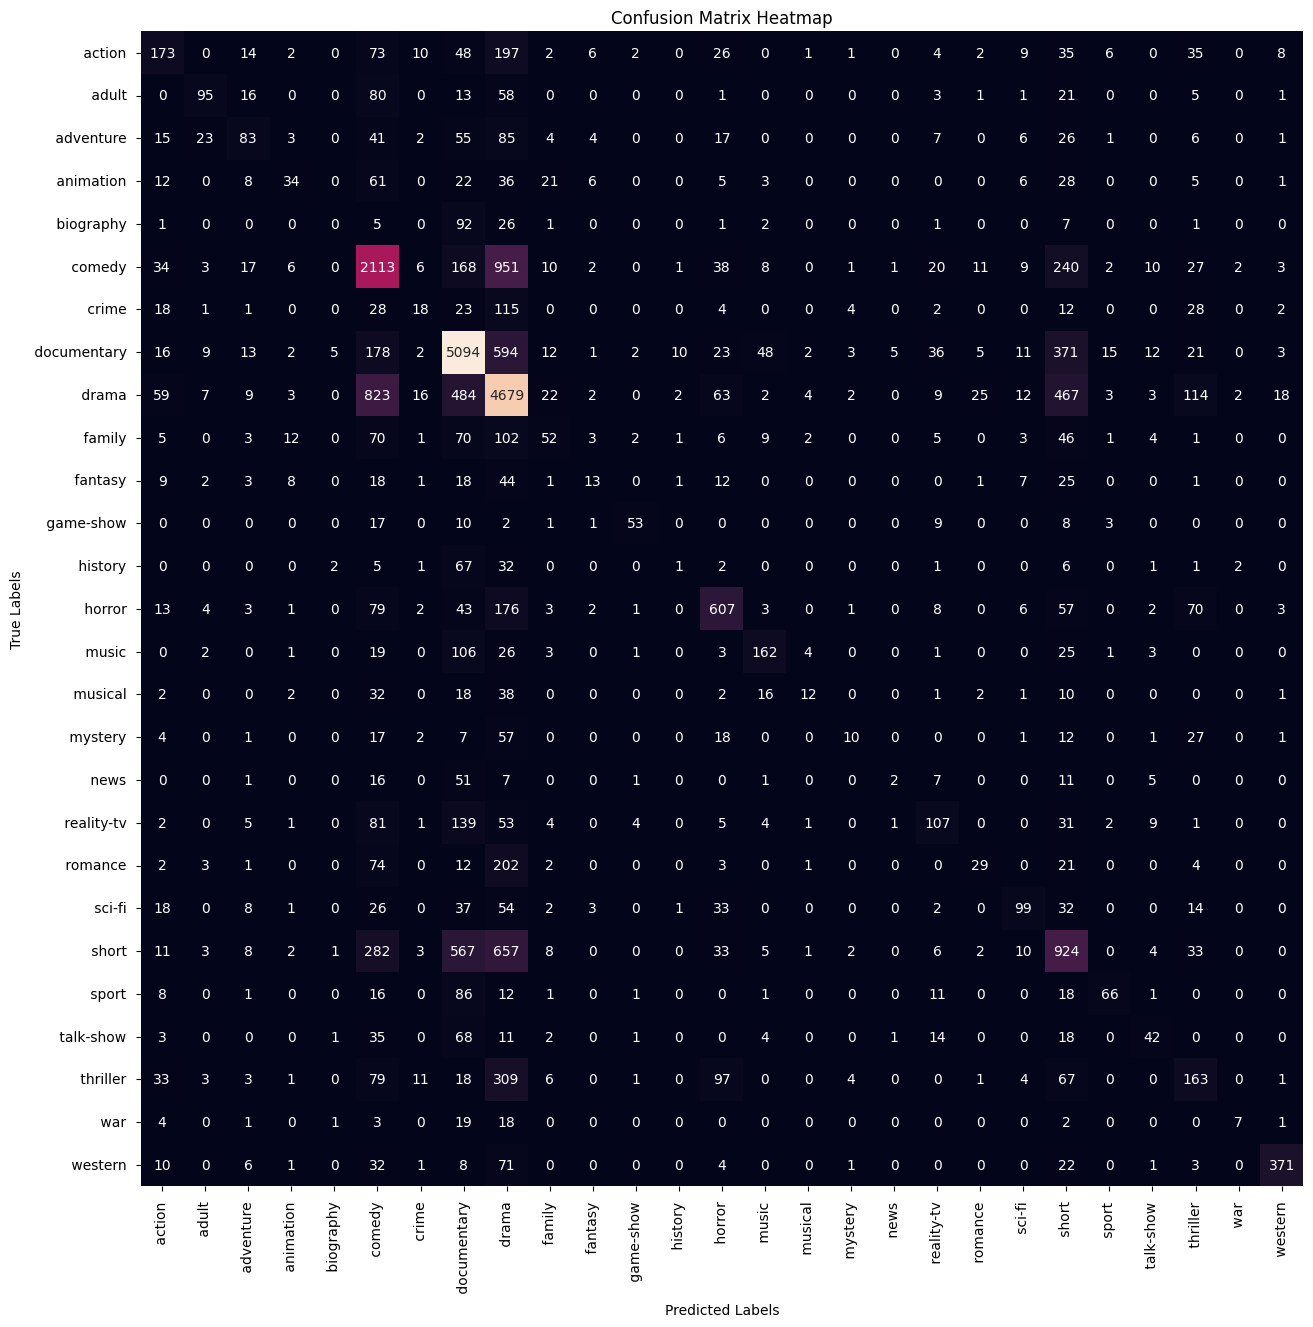

In [42]:
# classification using logistic regression
model = LogisticRegression()
model.fit(x_train2 ,y_train)
print("Model Score on Training data",model.score(x_train2 ,y_train))
print("Model Score on Test data",model.score(x_test2 ,y_test))
y_pred = model.predict(x_test2)
print(classification_report(y_pred ,y_test))


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cbar=False, 
            xticklabels=class_names, yticklabels=class_names)  # Replace 'class_names' with your class labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

c:\Users\krish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\krish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Score on Training data 0.9995573099199468
Model Score on Test data 0.5067325783008079
               precision    recall  f1-score   support

      action        0.24      0.29      0.26       548
       adult        0.34      0.49      0.40       204
   adventure        0.24      0.33      0.28       282
   animation        0.12      0.24      0.16       131
   biography        0.01      0.03      0.01        40
      comedy        0.52      0.47      0.49      4125
       crime        0.07      0.12      0.09       152
 documentary        0.73      0.68      0.70      6924
       drama        0.60      0.53      0.56      7745
      family        0.15      0.22      0.17       266
     fantasy        0.09      0.15      0.11        96
   game-show        0.57      0.71      0.63        83
     history        0.00      0.00      0.00        42
      horror        0.53      0.52      0.53      1120
       music        0.44      0.53      0.48       295
     musical        0.07   

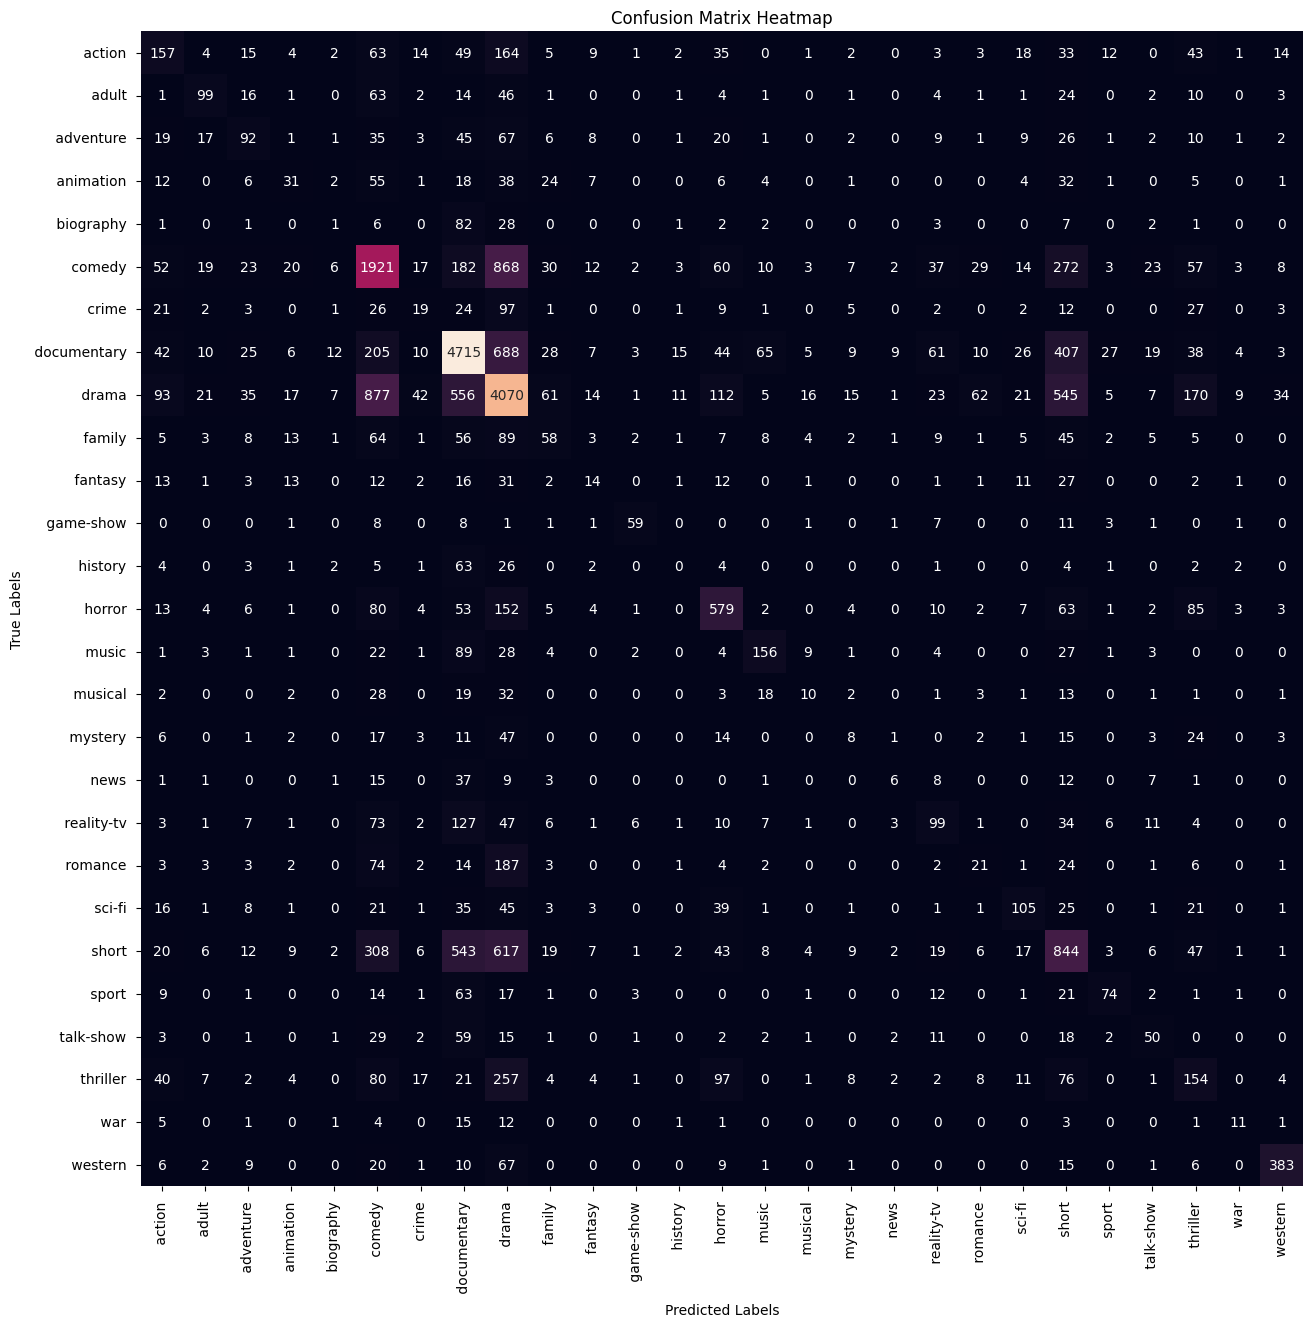

In [43]:
svm = LinearSVC()
svm.fit(x_train2 ,y_train)
print("Model Score on Training data",svm.score(x_train2 ,y_train))
print("Model Score on Test data",svm.score(x_test2 ,y_test))
y_pred = svm.predict(x_test2)
print(classification_report(y_pred ,y_test))
## As we can see from accuracy that the model the not performing well



cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cbar=False, 
            xticklabels=class_names, yticklabels=class_names)  # Replace 'class_names' with your class labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()